# ASSIGNMENT II - HANC with a Welfare State

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np

from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

## Setup and tests

In [2]:
model = HANCWelfareModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
path = model.path

### Test 1: Solving and simulating the household problem

We set all the steady values for the household problem manually at ad hoc values:

In [4]:
ss.r  = 0.02 * (1 - 0.1)
ss.wt = 1.00 * (1 - 0.3)
ss.S = np.min([par.G_ss, par.L_G_ss*par.Gamma_G_ss])
ss.chi = 0.0
ss.G = 0.4

model.solve_hh_ss(do_print=True)
model.simulate_hh_ss(do_print=True)

household problem in ss solved in 0.2 secs [345 iterations]
household problem in ss simulated in 8.3 secs [425 iterations]


We check whether the ... clears 

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 1.6 secs
household problem simulated along transition in 3.3 secs



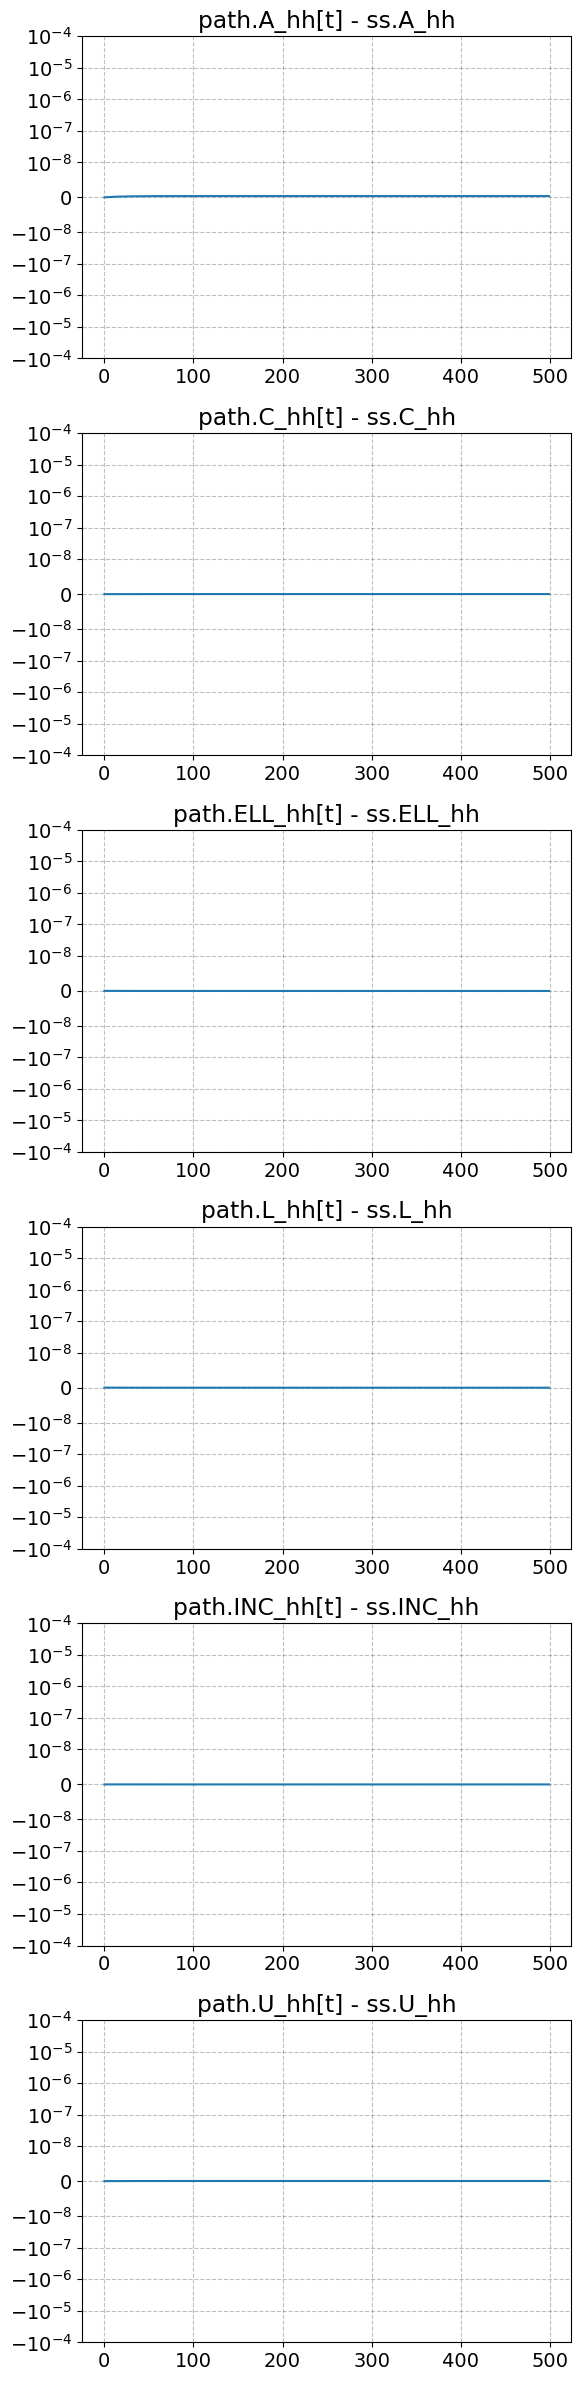

In [5]:
model.test_hh_path()

### Test 2: Evaluating the objective for finding the steady state

See for which K/L and tau values for which the markets clear thus the steady state values

In [6]:
for KL in [1.0,2.0,3.0,4.0]:
    for tau in [0.0, 0.04, 0.05]:
        clearing_A, clearing_G = obj_ss(np.array([KL, tau]),model,do_print=False)
        print(f'{KL = :.2f}, {tau = :.2f} -> {clearing_A = :12.8f}, {clearing_G = :12.8f}')

KL = 1.00, tau = 0.00 -> clearing_A = -106.67228960, clearing_G =   0.68000000
KL = 1.00, tau = 0.04 -> clearing_A = -107.73070224, clearing_G =   0.67985120


/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/3. semester/HANK/3. Assignments/HANK/Assignment 2/steady_state.py:85: RuntimeWarning: invalid value encountered in scalar power
  ss.Y = par.Gamma_Y * ss.K**(par.alpha) * ss.L_Y**(1-par.alpha)


KL = 1.00, tau = 0.05 -> clearing_A = -107.73082072, clearing_G =   0.67981593
KL = 2.00, tau = 0.00 -> clearing_A = -102.85156554, clearing_G =   0.74472044
KL = 2.00, tau = 0.04 -> clearing_A = -102.80635669, clearing_G =   0.74382205
KL = 2.00, tau = 0.05 -> clearing_A = -102.80815497, clearing_G =   0.74360906
KL = 3.00, tau = 0.00 -> clearing_A = -29.50822308, clearing_G =   0.78930897
KL = 3.00, tau = 0.04 -> clearing_A = -27.37052483, clearing_G =   0.77019148
KL = 3.00, tau = 0.05 -> clearing_A = -27.15844941, clearing_G =   0.76532858
KL = 4.00, tau = 0.00 -> clearing_A =  -1.43205844, clearing_G =   0.82440064
KL = 4.00, tau = 0.04 -> clearing_A =   0.40072963, clearing_G =   0.78400857
KL = 4.00, tau = 0.05 -> clearing_A =   0.46437850, clearing_G =   0.77373402


The steady state is found and then more test are run

In [7]:
model.find_ss(do_print=True)

starting at KL = [3.8624] and tau = [0.0300]

 message: The solution converged.
 success: True
  status: 1
     fun: [ 2.238e-01  5.892e-01]
       x: [ 3.862e+00  2.167e-01]
    nfev: 19
    fjac: [[-1.000e+00 -3.941e-09]
           [ 3.941e-09 -1.000e+00]]
       r: [-1.186e+06 -6.046e+07  1.401e+00]
     qtf: [-2.238e-01 -5.892e-01]

steady state found in 6.7 secs
ss.K =  2.373
ss.B =  0.000
ss.A_hh =  1.971
ss.L_Y =  0.614
ss.L_G =  0.400
ss.G =  0.400
ss.tau =  0.217
ss.S =  0.400
ss.Y =  0.921
ss.r =  0.016
ss.w =  1.050
ss.clearing_A = 4.02e-01
ss.clearing_L = -3.63e-09
ss.clearing_Y = -5.83e-01
ss.clearing_G = 5.89e-01


In [8]:
model.test_ss()

K              :       2.3725
L_Y            :       0.6143
rK             :       0.1165
w              :       1.0499
Y              :       0.9213
A              :       2.3725
r              :       0.0165
B              :       0.0000
tau            :       0.2167
wt             :       0.8224
S              :       0.4000
G              :       0.4000
L_G            :       0.4000
Gamma_G        :       1.0000
chi            :       0.0000
A_hh           :       1.9709
C_hh           :       0.8666
ELL_hh         :       1.0938
L_hh           :       1.0143
INC_hh         :       0.8666
U_hh           :      -4.4277
I              :       0.2373
clearing_A     :       0.4017
clearing_L     :      -0.0000
clearing_Y     :      -0.5826
clearing_G     :       0.5892


In [9]:
model.test_path(in_place=False)

shocks: G L_G Gamma_G 
unknowns: K L_Y 

blocks.production_firm
 rK               1.4e-17
 w                2.2e-16
 Y                0.0e+00
blocks.mutual_fund
 A                0.0e+00
 r                1.4e-17
blocks.government
 B                0.0e+00
 tau              0.0e+00
 wt               2.2e-16
 S                0.0e+00
 chi              0.0e+00
hh
 A_hh             2.8e-10
 C_hh             8.6e-12
 ELL_hh           1.8e-11
 L_hh             1.5e-11
 INC_hh           7.9e-12
 U_hh             2.9e-11
blocks.market_clearing
 I                2.2e-16
 clearing_A       4.0e-01 [target]
 clearing_L       7.3e-09
 clearing_Y       8.6e-12
 clearing_G       5.9e-01 [target]


In [10]:
model.compute_jacs(do_print=False)

In [11]:
model.find_transition_path(shocks=[],do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 5.89e-01
   4.02e-01 in clearing_A
   5.89e-01 in clearing_G
 it =   1 -> max. abs. error = 4.47e+02
   4.47e+02 in clearing_A
   6.08e-01 in clearing_G
 it =   2 -> max. abs. error = 4.28e+02
   4.28e+02 in clearing_A
   7.19e-01 in clearing_G
 it =   3 -> max. abs. error = 3.95e+02
   3.95e+02 in clearing_A
   6.35e-01 in clearing_G
backtracking...
backtracking...


/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/3. semester/HANK/3. Assignments/HANK/Assignment 2/blocks.py:17: RuntimeWarning: invalid value encountered in power
  rK[:] = par.alpha*par.Gamma_Y*(K_lag/L_Y)**(par.alpha-1.0)
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/3. semester/HANK/3. Assignments/HANK/Assignment 2/blocks.py:19: RuntimeWarning: invalid value encountered in power
  w[:] = (1.0-par.alpha)*par.Gamma_Y*(K_lag/L_Y)**par.alpha
/Users/juliekrabek/Library/Mobile Documents/com~apple~CloudDocs/Uni/2 - KU/3. semester/HANK/3. Assignments/HANK/Assignment 2/blocks.py:22: RuntimeWarning: invalid value encountered in power
  Y[:] = par.Gamma_Y*K_lag**(par.alpha)*L_Y**(1-par.alpha)
/Users/juliekrabek/GEModelTools/GEModelTools/GEModelClass.py:1623: UserWarning: warning: variable rK contains nan (blocks.production_firm)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
/Users/juliekrabek/GEModelTools/GEMod

 it =   4 -> max. abs. error = 2.99e+02
   2.99e+02 in clearing_A
   5.93e-01 in clearing_G
 it =   5 -> max. abs. error = 6.52e+02
   6.52e+02 in clearing_A
   7.47e-01 in clearing_G


ValueError: GEModelTools: No improvement for 5 iterations

## a) Find the stationary equilibrium without a government $(G_t = L^G_t = \chi_t = 0)$. Report the expected discounted utility.

### Find the stationary equilibrium 

In [ ]:
par.G_ss = 0.0
par.L_G_ss = 0.0
par.chi_ss = 0.0
model.find_ss(do_print=True)
model.test_path(in_place=False)
model.compute_jacs(do_print=False)
model.find_transition_path(shocks=[],do_print=False)

### Expected discounted utility

In [ ]:
va = np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
print('Expected discounted utility = ', va.round(4))

## b) Find optimal welfare policies I. Choose $G_t$ and $L^G_t$ to maximize expected discounted utility in the stationary equilibrium. Keep $\chi_t = 0$. Report $G_t$/$Y_t$.

In [ ]:
for i in np.arange(0, 1.1, 0.1):
    par = model.par
    path = model.path
    ss = model.ss

    par.G_ss = i 
    par.L_G_ss = par.G_ss

    try:
        model.find_ss(do_print=False)  # Print intermediate values
        model.test_path(in_place=False) 
        model.compute_jacs(do_print=False)
        #model.find_transition_path(shocks=[],do_print=False)
    except Exception as e:
        print(f"Error during steady-state calculation: {e}")
        U = np.nan

    # print(f'{ss.S = :6.3f} and {ss.U_hh = :6.3f} and {par.L_G_ss = :6.3f}')
    #U = np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
    print(U)

In [ ]:
def optimize_expected_discounted_utility(x, model):
    par = model.par
    path = model.path

    par.G_ss = x[0]
    par.L_G_ss = par.G_ss
    print(par.G_ss)
    try:
        model.find_ss(do_print=False)  # Print intermediate values
        model.test_path(in_place=False) 
        model.compute_jacs(do_print=False)
        model.find_transition_path(shocks=[],do_print=False)
        U =  - np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
    except Exception as e:
        print(f"Error during steady-state calculation: {e}")
        U = np.nan

    print(U)

    return np.array([U])

In [ ]:
initial_guess =  np.array([0.4])
bounds = optimize.Bounds(lb=0, ub=1, keep_feasible=False)
res = optimize.minimize(optimize_expected_discounted_utility, initial_guess, args=(model,),method='Nelder-Mead', bounds = bounds)
print(res)

In [ ]:
plt.title('$G_t/Y_t$')
plt.plot(range(par.T),path.G/path.Y)
plt.plot()
plt.xlabel('t')

In [ ]:
def u_gov(x):
    """ss discounted sum of utility  given government level"""
    par.G_ss = x[0]
    model.find_ss(do_print=False)

    #model.find_transition_path(shocks=[],do_print=False)
    model.test_path(in_place=False) 
    model.compute_jacs(do_print=False)
    model.find_transition_path(shocks=[],do_print=False)

    U = np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
    
    return U

def obj_gov(x):
    """Objective function with government as the choice variable"""
    return - u_gov(x)

In [ ]:
par.chi_ss = 0.0
from scipy.optimize import minimize_scalar
result = minimize_scalar(obj_gov, bounds=(0.4, 0.5), method='bounded')

## c) Find optimal welfare policies II. Repeat b) allowing for $\chi_t \neq 0$. Discuss whether positive or negative transfer are optimal.

In [ ]:
model_c = HANCWelfareModelClass(name='baseline')

par = model_c.par
ss = model_c.ss
path = model_c.path

ss.r  = 0.02 * (1 - 0.1)
ss.wt = 1.00 * (1 - 0.3)
ss.S = np.min([par.G_ss, par.L_G_ss*par.Gamma_G])

In [ ]:
def optimize_expected_discounted_utility_c(x, model_c):
    par = model_c.par
    path = model_c.path
    ss = model_c.ss

    par.G_ss = x[0]
    par.L_G_ss = par.G_ss
    par.chi_ss = x[1]
    
    print(par.G_ss, par.chi_ss)

    try:
        model_c.find_ss(do_print=False)  # Print intermediate values
        U = np.sum([par.beta**t * np.sum(path.u[t]*path.D[t]/np.sum(path.D[t])) for t in range(par.T)])
    except Exception as e:
        print(f"Error during steady-state calculation: {e}")
        U = np.nan

    return np.array([U])

In [ ]:
initial_guess =  np.array([0.4, 0.1])
bounds_G_ss = optimize.Bounds(lb=0, ub=1, keep_feasible=False)
bounds_chi_ss = optimize.Bounds(lb=-1, ub=1, keep_feasible=False)
bounds = (bounds_G_ss, bounds_chi_ss)
res_c = optimize.minimize(optimize_expected_discounted_utility_c, initial_guess, args=(model,),method='Nelder-Mead', bounds = bounds)
print(res_c)

## d) Increased TFP. Repeat question c) with $\Gamma^Y = 1.1$. Comment on the differences.

In [ ]:
par.Gamma_Y = 1.1
res_d = optimize.minimize(optimize_expected_discounted_utility_c, initial_guess, args=(model,),method='Nelder-Mead', bounds = bounds)
print(res_d)

## e) Transition path. Compute the transition path from the stationary equilibrium in c) to the one in d). Argue for you choice of policies path of $G_t$, $L^G_t$ and $\chi_t$.